In [1]:
import os
import sys
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from load_data_fn import load_data
from AE_Stats import gen_all_stats

from Naive_DAE import Naive_DAE
 
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset

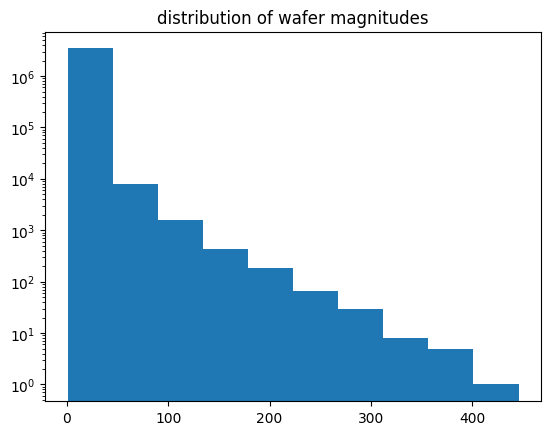

In [31]:
plt.hist(magnitudes,log = True)
plt.title('distribution of wafer magnitudes')
plt.show()

In [23]:
torch.mean(stds)

tensor(35.9798)

In [19]:
torch.median(dt)

tensor(-0.1575)

In [9]:
arr.mean()

CALQ_0         5.977610
CALQ_1         5.668818
CALQ_2         5.836808
CALQ_3         5.881405
CALQ_4         6.193049
CALQ_5         5.789868
CALQ_6         5.741114
CALQ_7         5.782455
CALQ_8         5.994319
CALQ_9         5.611047
CALQ_10        5.762338
CALQ_11        5.630962
CALQ_12        5.421058
CALQ_13        5.179040
CALQ_14        5.258316
CALQ_15        5.199371
CALQ_16        5.934356
CALQ_17        5.652316
CALQ_18        5.834523
CALQ_19        5.882794
CALQ_20        6.134096
CALQ_21        5.727072
CALQ_22        5.785675
CALQ_23        5.798369
CALQ_24        5.986289
CALQ_25        5.578363
CALQ_26        5.764768
CALQ_27        5.663923
CALQ_28        5.381055
CALQ_29        5.234657
CALQ_30        5.294807
CALQ_31        5.265918
CALQ_32        5.984278
CALQ_33        5.709338
CALQ_34        5.837329
CALQ_35        5.880834
CALQ_36        6.192697
CALQ_37        5.761600
CALQ_38        5.828318
CALQ_39        5.813512
CALQ_40        6.011702
CALQ_41        5

In [13]:
import importlib
importlib.reload(AE_Stats)

<module 'AE_Stats' from '/uscms_data/d3/nswood/Notebooks/ECON_AE_Development/AE_Stats.py'>

In [7]:
dt,dt_loc = load_data(3)

In [8]:
size_train =200000
size_test = 7000000
train_loc = dt_loc[0:size_train]
test_loc = dt_loc[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=200,
    shuffle=False
)

test_loc_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=200,
    shuffle=False
)

train = dt[0:size_train]
test = dt[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test_dt=test[torch.randperm(test.size()[0])]
train_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=200,
    shuffle=False
)

test_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(test_dt)),
    batch_size=200,
    shuffle=False
)

In [4]:
def gen_eta_bins(dt_loc):
    low_eta = []
    mid_eta = []
    high_eta = []
    
    for event in dt_loc:
        if event[-2] < 2.0:
            low_eta.append(event)
        elif event[-2] < 2.6:
            mid_eta.append(event)
        else:
            high_eta.append(event)
    return torch.vstack(low_eta),torch.vstack(mid_eta),torch.vstack(high_eta)
        
    

MSE 1.9124538898468018
Median 0.0778389424085617
Standard Devitaion 9.188796043395996
Average % Error 55.96552276611328


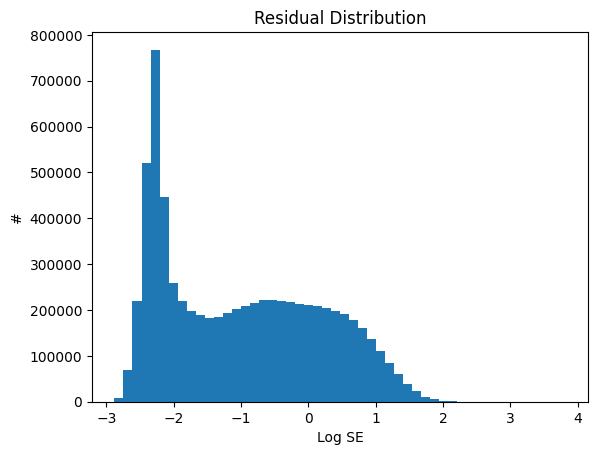

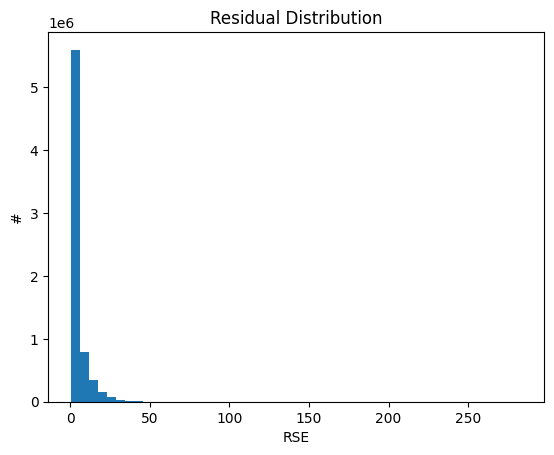

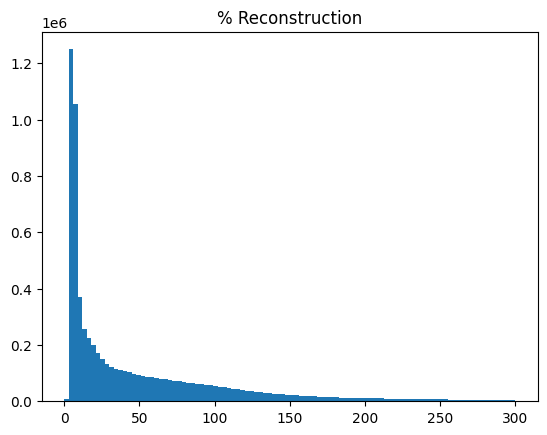

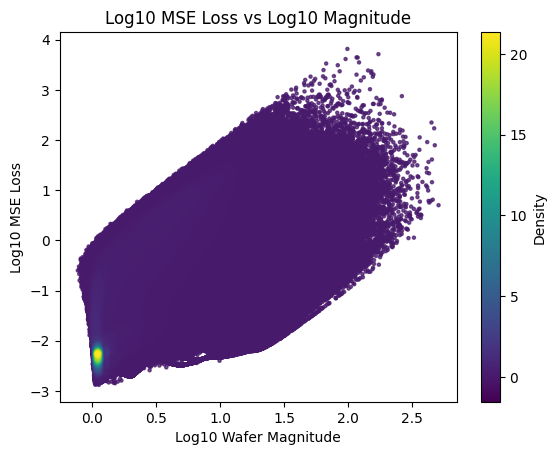

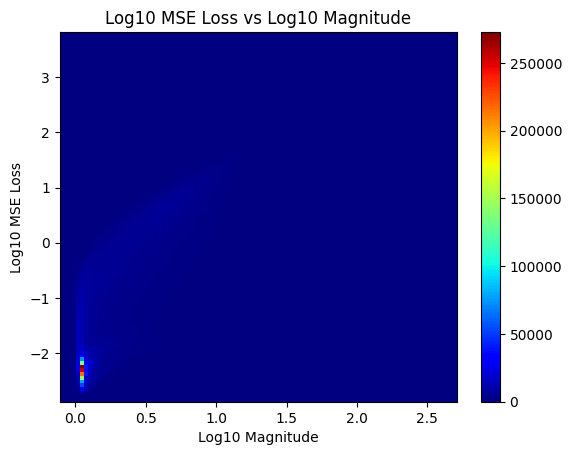

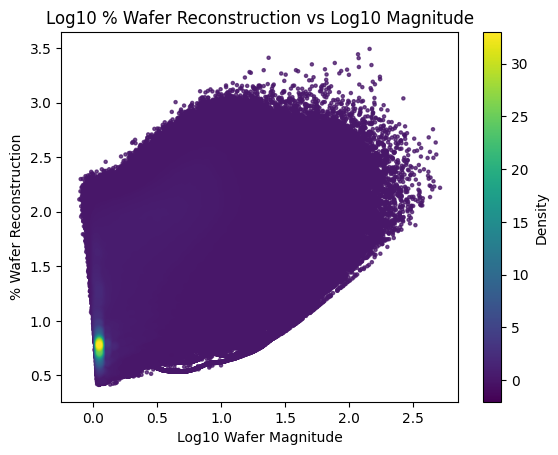

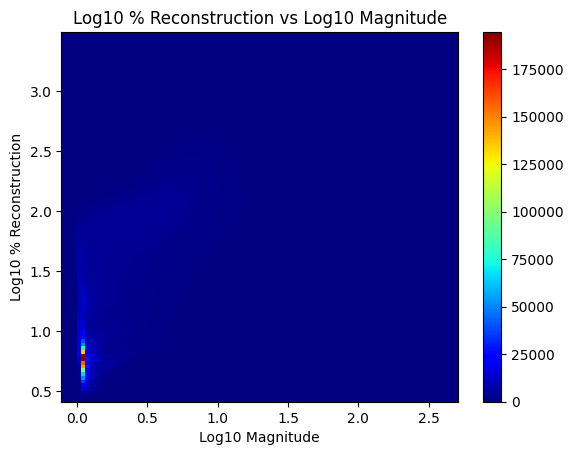

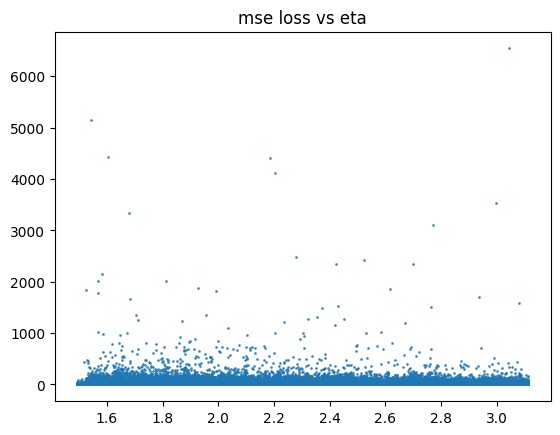

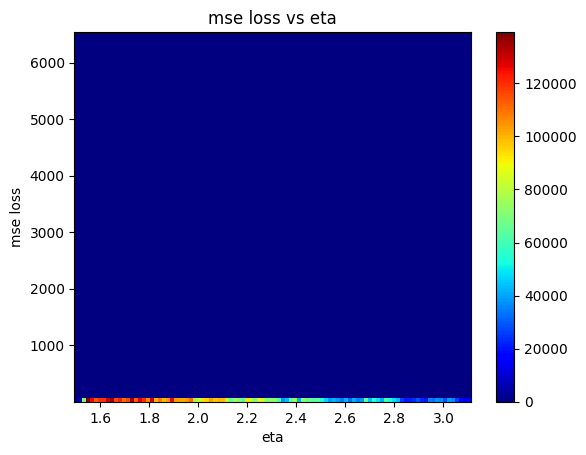

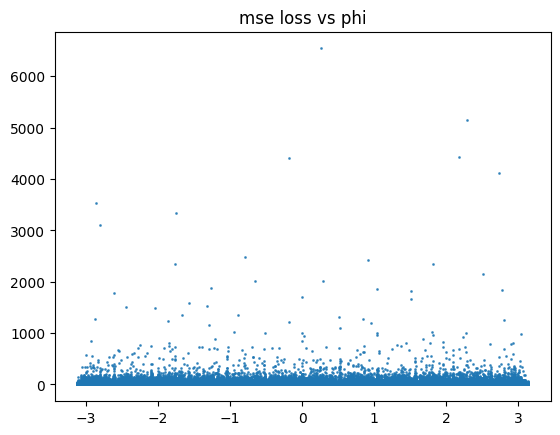

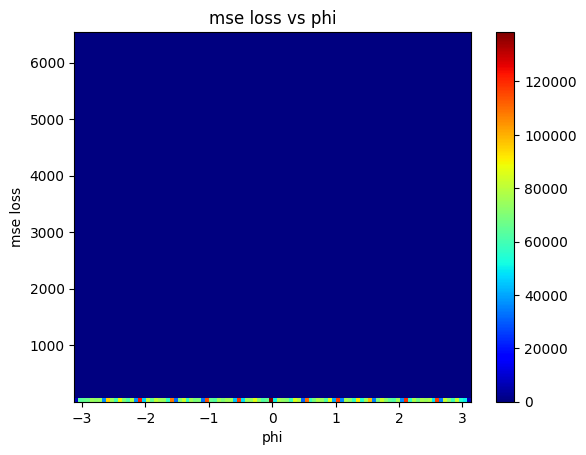

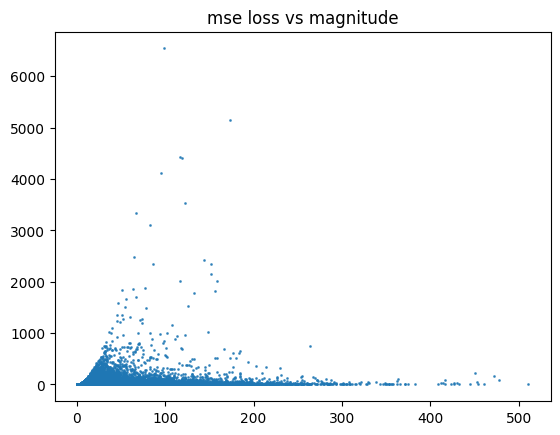

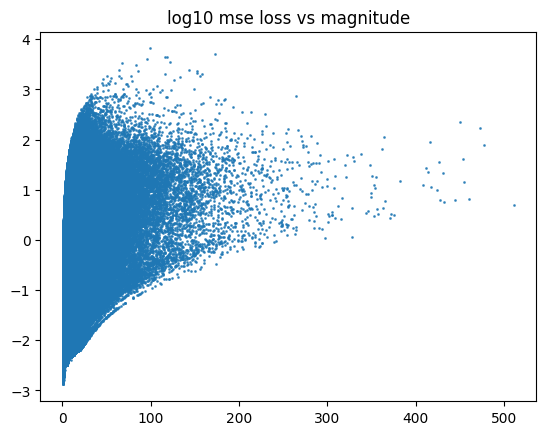

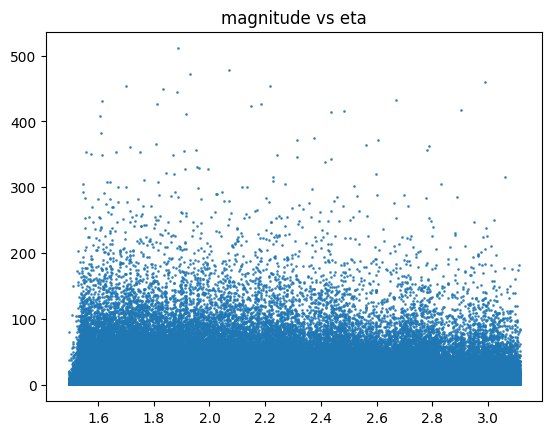

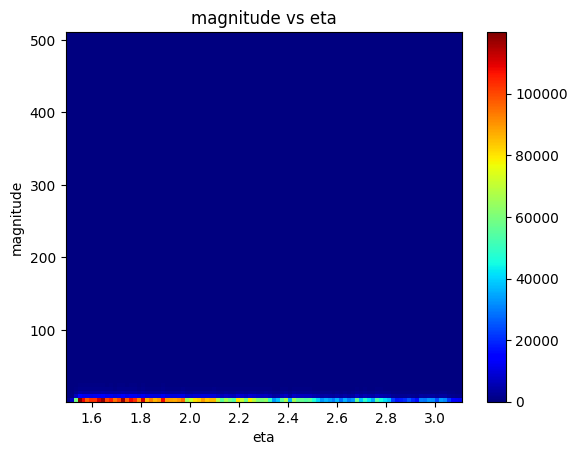

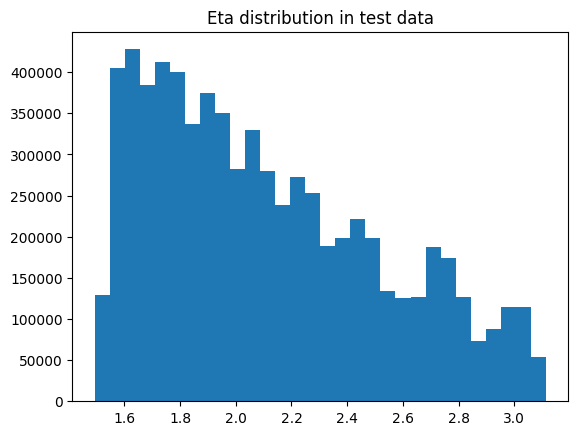

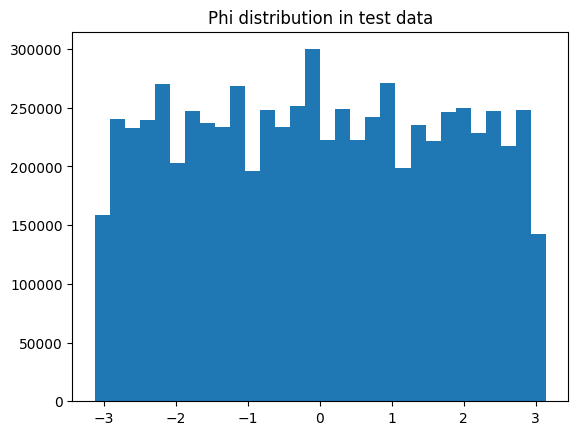

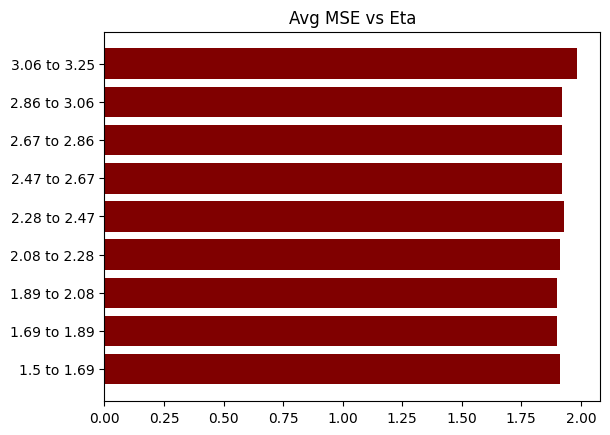

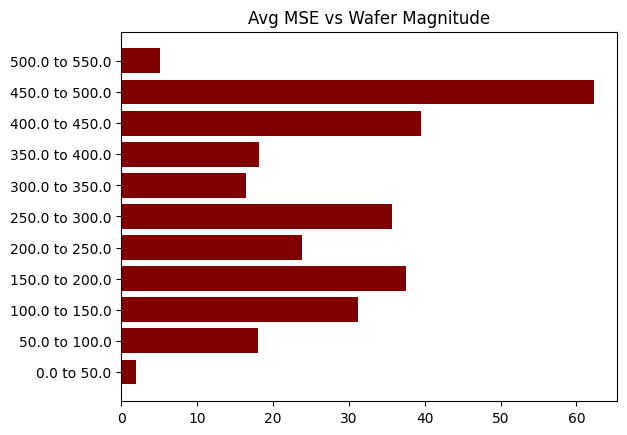

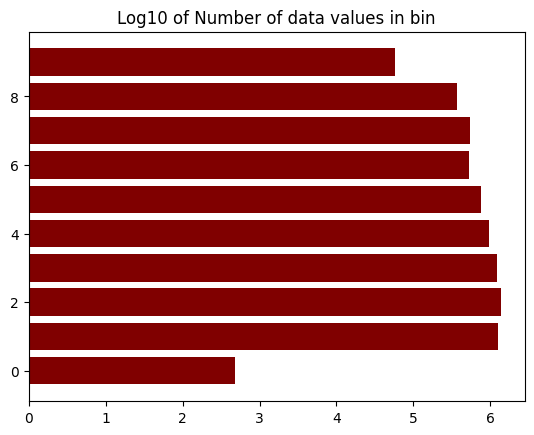

In [9]:
cur_model = torch.load('model_48_250_100_16')
pred = cur_model(test_dt)
truth = test_dt
pref = gen_all_stats(pred,truth,test_loc)


In [15]:
!pip install plivo

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 63.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [ ]:
import plivo
client = plivio.RestClient(`)

In [13]:
pred[0]

tensor([-0.1080,  0.0801, -0.1498, -0.2590, -0.0150, -0.0660, -0.1445, -0.1941,
         0.4655,  0.8116, -0.2677, -0.1848,  1.4117, -0.1100, -0.0688,  1.1734,
        -0.1107, -0.1000, -0.0765, -0.1279, -0.1121,  2.0724,  0.0210, -0.1459,
         0.0099,  0.2559, -0.1148, -0.0674, -0.0695, -0.0722, -0.0372, -0.0714,
         6.5149, -0.1442, -0.1970, -0.2358, -0.1396, -0.1459, -0.1393, -0.1823,
        -0.1795, -0.2468, -0.0344, -0.0939, -0.2065, -0.1362, -0.1139, -0.1163],
       grad_fn=<SelectBackward0>)

In [12]:
truth[0]

tensor([-0.1578,  0.5939, -0.1578, -0.1578, -0.1578,  0.3155,  0.3155, -0.1578,
         0.5661,  0.7331, -0.1578, -0.1578,  1.4570, -0.1578, -0.1578,  1.5405,
        -0.1578, -0.1578, -0.1578, -0.1578, -0.1578,  2.2087, -0.1578, -0.1578,
        -0.1578,  0.3433, -0.1578, -0.1578, -0.1578, -0.1578, -0.1578, -0.1578,
         6.0788, -0.1578, -0.1578, -0.1578, -0.1578, -0.1578, -0.1578, -0.1578,
        -0.1578, -0.1578,  0.2319, -0.1578, -0.1578, -0.1578, -0.1578, -0.1578])

In [53]:
torch.mean((100*torch.abs((pred-truth))/torch.abs(truth)))

tensor(94.1750, grad_fn=<MeanBackward0>)

In [46]:
print(f'Average % Error {100*torch.abs((pred-truth))/torch.abs(truth)}')

Average % Error tensor([[7.6186e+01, 3.7700e-01, 3.8641e+00,  ..., 3.9375e-01, 3.1238e-01,
         1.1227e+01],
        [7.4779e+01, 3.8980e+01, 5.0203e+01,  ..., 9.1917e+00, 4.0894e+02,
         7.4153e+01],
        [4.9310e+04, 8.2952e+00, 6.7044e+00,  ..., 2.6485e+01, 1.2770e+01,
         8.5498e+00],
        ...,
        [7.9149e+00, 1.6495e+00, 1.0649e+01,  ..., 1.0115e+01, 7.3921e+00,
         5.8662e+00],
        [3.1302e+04, 4.3425e+00, 3.4151e+01,  ..., 3.1711e+00, 1.9399e+00,
         3.0562e-01],
        [2.3464e+02, 2.5623e+01, 5.7279e+02,  ..., 3.7282e+02, 1.0233e+02,
         7.5967e+01]], grad_fn=<DivBackward0>)


In [9]:
(pred-truth/truth)[0]

tensor([-0.9632, -1.1580, -1.1574, -1.1768, -1.1511, -1.1471, -1.1758, -1.1820,
        -1.1628, -1.1584, -1.1549, -1.1739, -1.1532, -1.1492, -1.1621, -1.1494,
        -1.1668, -1.1701, -1.1785, -1.1686, -1.1559, -1.1693, -1.1519, -0.5919,
        -1.1381, -0.7432, -1.1657, -1.0469, -1.1560, -1.1411, -1.1497, -1.0678,
        -1.1776, -1.1504, -1.1680, -1.1636, -1.1535, -1.1687, -1.1686, -1.1425,
        -1.1611, -1.1404, -1.1470, -1.1529, -1.1469, -1.1529, -1.1510, -1.1356],
       grad_fn=<SelectBackward0>)

In [10]:
pred[0]

tensor([ 0.0368, -0.1580, -0.1574, -0.1768, -0.1511, -0.1471, -0.1758, -0.1820,
        -0.1628, -0.1584, -0.1549, -0.1739, -0.1532, -0.1492, -0.1621, -0.1494,
        -0.1668, -0.1701, -0.1785, -0.1686, -0.1559, -0.1693, -0.1519,  0.4081,
        -0.1381,  0.2568, -0.1657, -0.0469, -0.1560, -0.1411, -0.1497, -0.0678,
        -0.1776, -0.1504, -0.1680, -0.1636, -0.1535, -0.1687, -0.1686, -0.1425,
        -0.1611, -0.1404, -0.1470, -0.1529, -0.1469, -0.1529, -0.1510, -0.1356],
       grad_fn=<SelectBackward0>)

In [11]:
truth[0]

tensor([ 0.1544, -0.1586, -0.1637, -0.1626, -0.1643, -0.1584, -0.1642, -0.1666,
        -0.1621, -0.1621, -0.1590, -0.1614, -0.1505, -0.1545, -0.1546, -0.1472,
        -0.1641, -0.1621, -0.1568, -0.1644, -0.1612, -0.1625, -0.1638,  0.4555,
        -0.1588,  0.2703, -0.1665, -0.0189, -0.1583, -0.1476, -0.1555, -0.0072,
        -0.1590, -0.1623, -0.1601, -0.1612, -0.1641, -0.0486, -0.0227, -0.1620,
        -0.1597, -0.1566, -0.1046, -0.1530, -0.1549, -0.1535, -0.1505, -0.1528])

In [31]:
((pred-truth)/truth)[0]*100

tensor([-7.6186e+01, -3.7700e-01, -3.8641e+00,  8.7312e+00, -8.0622e+00,
        -7.0929e+00,  7.0767e+00,  9.2358e+00,  4.3258e-01, -2.2515e+00,
        -2.5775e+00,  7.7441e+00,  1.8205e+00, -3.4496e+00,  4.8954e+00,
         1.5412e+00,  1.6325e+00,  4.8887e+00,  1.3854e+01,  2.5591e+00,
        -3.2561e+00,  4.1709e+00, -7.2461e+00, -1.0397e+01, -1.2992e+01,
        -4.9700e+00, -4.8051e-01,  1.4822e+02, -1.4298e+00, -4.3695e+00,
        -3.7787e+00,  8.3601e+02,  1.1701e+01, -7.3210e+00,  4.9429e+00,
         1.4459e+00, -6.4903e+00,  2.4694e+02,  6.4437e+02, -1.2020e+01,
         8.4507e-01, -1.0354e+01,  4.0533e+01, -6.2171e-02, -5.2165e+00,
        -3.9375e-01,  3.1238e-01, -1.1227e+01], grad_fn=<MulBackward0>)

In [35]:
torch.round(((pred-truth)/truth)*100)

tensor([[-7.6000e+01, -0.0000e+00, -4.0000e+00,  ..., -0.0000e+00,
          0.0000e+00, -1.1000e+01],
        [ 7.5000e+01, -3.9000e+01, -5.0000e+01,  ..., -9.0000e+00,
          4.0900e+02,  7.4000e+01],
        [-4.9310e+04,  8.0000e+00,  7.0000e+00,  ..., -2.6000e+01,
         -1.3000e+01,  9.0000e+00],
        ...,
        [-8.0000e+00, -2.0000e+00,  1.1000e+01,  ..., -1.0000e+01,
         -7.0000e+00, -6.0000e+00],
        [-3.1302e+04,  4.0000e+00, -3.4000e+01,  ...,  3.0000e+00,
          2.0000e+00, -0.0000e+00],
        [-2.3500e+02,  2.6000e+01, -5.7300e+02,  ..., -3.7300e+02,
          1.0200e+02, -7.6000e+01]], grad_fn=<RoundBackward0>)

In [7]:
latent_space = cur_model.encode(test)

In [8]:
all_latent = torch.flatten(latent_space)

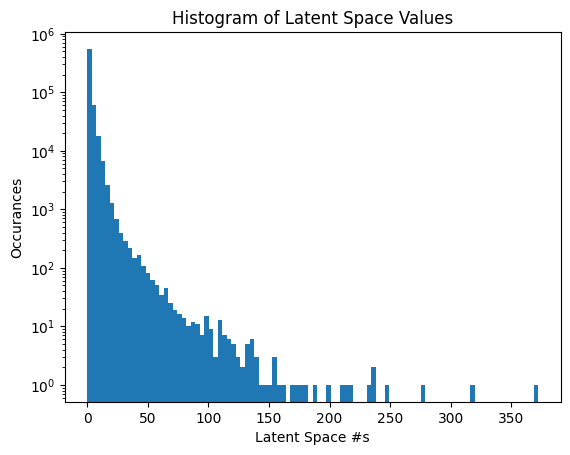

In [9]:
plt.figure()
plt.ylabel('Occurances')
plt.xlabel('Latent Space #s')
plt.title('Histogram of Latent Space Values')
plt.hist(all_latent.detach().numpy(), bins = 100,log=True)
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn


def using_hist2d(fig,ax, x, y, bins=(50, 50)):
    # https://stackoverflow.com/a/20105673/3015186
    # Answer by askewchan
    h = ax.hist2d(x, y, bins, cmap=plt.cm.jet)
    fig.colorbar(h[3], ax=ax)

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax


def generate_stats(decoded, truth,test_loc):
    
    eps = 10e-8
    #Printing basic info
    print(f'MSE {torch.mean(torch.sum((decoded-truth)**2,dim =1))}')
    print(f'Median {torch.median(torch.sum((decoded-truth)**2,dim =1))}')
    print(f'Standard Devitaion {torch.std(torch.sum((decoded-truth)**2,dim =1))}')
    print(f'Average % Error {torch.mean(100*torch.mean(torch.abs((decoded-truth))/torch.abs(truth),dim =1))}')


    #plotting residual distribution
    
    plt.figure()
    plt.hist(np.log10(torch.sum((decoded-truth).cpu()**2 +eps,dim =1).detach().numpy()), bins = 50)
    plt.xlabel('Log SE')
    plt.ylabel('#')
    plt.title('Residual Distribution')
    plt.show()

    plt.figure()
    plt.hist((torch.sum(torch.sqrt((decoded-truth).cpu()**2+eps),dim =1).detach().numpy()), bins = 50)
    plt.xlabel('RSE')
    plt.ylabel('#')
    plt.title('Residual Distribution')
    plt.show()

    pref = torch.hstack((test_loc[:,-2:],torch.sum((truth)**2,dim=1,keepdim = True)**0.5,torch.sum((decoded-truth)**2,dim=1,keepdim = True),torch.sum(torch.abs((decoded-truth)),dim=1,keepdim = True)))
    
    plt.figure()
    plt.title('% Reconstruction')
    plt.hist(torch.mean(100*torch.abs((decoded-truth))/torch.abs(truth),dim =1).detach().numpy(),range = [0,300], bins = 100)
    plt.show()


    density_scatter(np.log10(pref[:,2].detach().numpy()),np.log10(pref[:,-2].detach().numpy()), bins = [100,100],s = 5, alpha = 0.75)
    plt.title('Log10 MSE Loss vs Log10 Magnitude')
    plt.xlabel('Log10 Wafer Magnitude')
    plt.ylabel('Log10 MSE Loss')
    plt.show()
    
    fig, ax = plt.subplots()
    using_hist2d(fig,ax,np.log10(pref[:,2].detach().numpy()),np.log10(pref[:,-2].detach().numpy()),bins =[50,50])
    plt.title('Log10 MSE Loss vs Log10 Magnitude')
    plt.xlabel('Log10 Magnitude')
    plt.ylabel('Log10 MSE Loss')
    plt.show()
    
    density_scatter(np.log10(pref[:,2].detach().numpy()),np.log10(torch.mean(100*torch.abs((pred-truth))/torch.abs(truth),dim =1).detach().numpy()), bins = [100,100],s = 5, alpha = 0.75)
    plt.title('Log10 % Wafer Reconstruction vs Log10 Magnitude')
    plt.xlabel('Log10 Wafer Magnitude')
    plt.ylabel('% Wafer Reconstruction')
    plt.show()
    
    fig, ax = plt.subplots()
    using_hist2d(fig,ax,np.log10(pref[:,2].detach().numpy()),np.log10(torch.mean(100*torch.abs((pred-truth))/torch.abs(truth),dim =1).detach().numpy()),bins =[50,50])
    plt.title('Log10 % Reconstruction vs Log10 Magnitude')
    plt.xlabel('Log10 Magnitude')
    plt.ylabel('Log10 % Reconstruction')
    plt.show()

    plt.figure()
    plt.title('mse loss vs eta')
    plt.scatter(pref[:,0].detach().numpy(),pref[:,-2].detach().numpy(), s = 1, alpha = 0.75)
    plt.show()

    plt.figure()
    plt.title('mse loss vs phi')
    plt.scatter(pref[:,1].detach().numpy(),pref[:,-2].detach().numpy(), s = 1, alpha = 0.75)
    plt.show()

    plt.figure()
    plt.title('mse loss vs magnitude')
    plt.scatter(pref[:,2].detach().numpy(),pref[:,-2].detach().numpy(), s = 1, alpha = 0.75)
    plt.show()


    plt.figure()
    plt.title('log10 mse loss vs magnitude')
    plt.scatter((pref[:,2].detach().numpy()),np.log10(pref[:,-2].detach().numpy()), s = 1, alpha = 0.75)
    plt.show()

    plt.figure()
    plt.title('magnitude vs eta')
    plt.scatter(pref[:,0].detach().numpy(),pref[:,2].detach().numpy(), s = 1, alpha = 0.75)
    plt.show()
    return pref
    
def gen_avg_perf(decoded,truth,test_loc):
    
    perf_data = torch.hstack((test_loc[:,-2:],torch.sum((decoded)**2,dim=1,keepdim = True)**0.5,torch.sum((decoded-truth)**2,dim=1,keepdim = True)))
    plt.figure()
    plt.title('Eta distribution in test data')
    plt.hist(perf_data[:,0].detach().numpy(), bins = 30)
    plt.show()

    plt.figure()
    plt.title('Phi distribution in test data')
    plt.hist(perf_data[:,1].detach().numpy(), bins = 30)
    plt.show()
    
    eta_bins = 9
    eta_stat = binned_statistic(perf_data[:,0].detach().numpy(), perf_data[:,3].detach().numpy(), 
                                 statistic='mean', 
                                 bins=eta_bins, 
                                 range=(1.5, 3.25))
    eta_labels = []
    for i in range(len(eta_stat.statistic)):
        start = eta_stat.bin_edges[i]
        end = eta_stat.bin_edges[i+1]
        eta_labels.append(str(np.round(start,2)) + ' to ' + str(np.round(end,2)))
    plt.figure()
    plt.title('Avg MSE vs Eta')
    plt.barh(eta_labels, eta_stat.statistic, color ='maroon')
    plt.show()
    
    
    #want to find average performance over regions of eta and magnitude

    magn_stat = binned_statistic(perf_data[:,2].detach().numpy(), perf_data[:,3].detach().numpy(), 
                                 statistic='mean', 
                                 bins=20, 
                                 range=(0, 1000))
    eta_labels = []
    for i in range(len(magn_stat.statistic)):
        start = magn_stat.bin_edges[i]
        end = magn_stat.bin_edges[i+1]
        eta_labels.append(str(np.round(start,2)) + ' to ' + str(np.round(end,2)))
    plt.figure()
    plt.title('Avg MSE vs Wafer Magnitude')
    plt.barh(eta_labels, magn_stat.statistic, color ='maroon')
    plt.show()
    
    plt.figure()
    plt.title("Log10 of Number of data values in bin")
    plt.barh(np.unique(eta_stat.binnumber,return_counts = True)[0], np.log10(np.unique(eta_stat.binnumber,return_counts = True)[1]), color = 'maroon')